In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [2]:
def compute_loss(y,hx):
    return -np.mean(y * np.log(hx) + (1 - y) * np.log(1 - hx))

In [3]:
def compute_gradient(X, y, hx):
    return np.dot(X.T, (hx - y)) / y.shape[0]
    

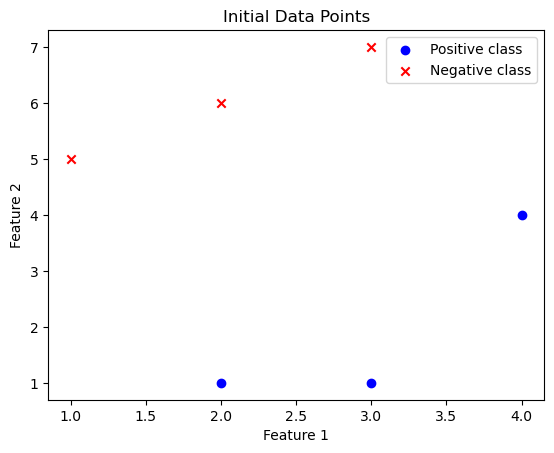

In [6]:
X=np.array(
    [[2,1],
    [3,1],
    [4,4],
    [1,5],
    [2,6],
    [3,7]]
)
y=np.array([1,1,1,0,0,0])

plt.scatter(X[:3,0],X[:3,1],color='blue',marker='o',label='Positive class')
plt.scatter(X[3:,0],X[3:,1],color='red',marker='x',label='Negative class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Initial Data Points')
plt.show()

In [7]:
def logistic_regression(X,y,learning_rate=0.01,num_iterations=10):
    X=np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    weights = np.zeros(X.shape[1])

    for i in range(num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z)
        loss = compute_loss(y, hx)
        gradient = compute_gradient(X, y, hx)
        weights -= learning_rate * gradient

        plot_decision_boundary(X, y, weights, i)
        print(f"Iteration {i+1}, Loss: {loss:.4f}")
    
    return weights

In [10]:
def plot_decision_boundary(X, y, weights, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:3, 1], X[:3, 2], color='blue', marker='o', label='Positive class')
    plt.scatter(X[3:, 1], X[3:, 2], color='red', marker='x', label='Negative class')

    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min = -(weights[0] + weights[1] * x_min) / weights[2]
    y_max = -(weights[0] + weights[1] * x_max) / weights[2]
    
    plt.plot([x_min, x_max], [y_min, y_max], color='green', label='Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary at Iteration {iteration+1}')
    plt.legend()
    plt.show()

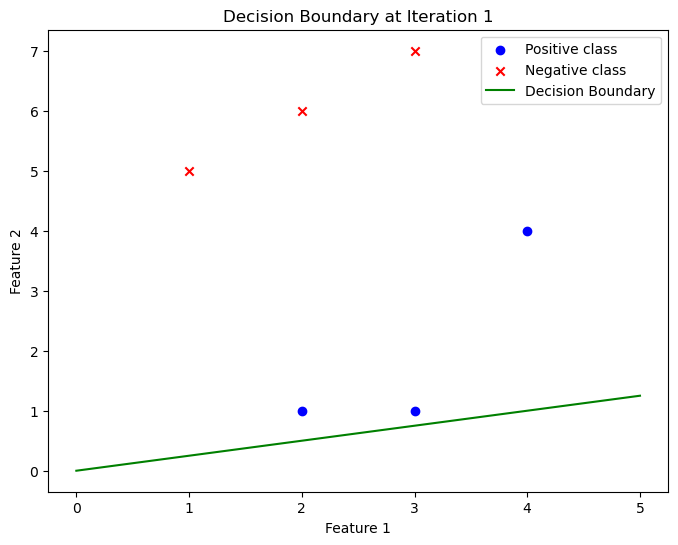

Iteration 1, Loss: 0.6931


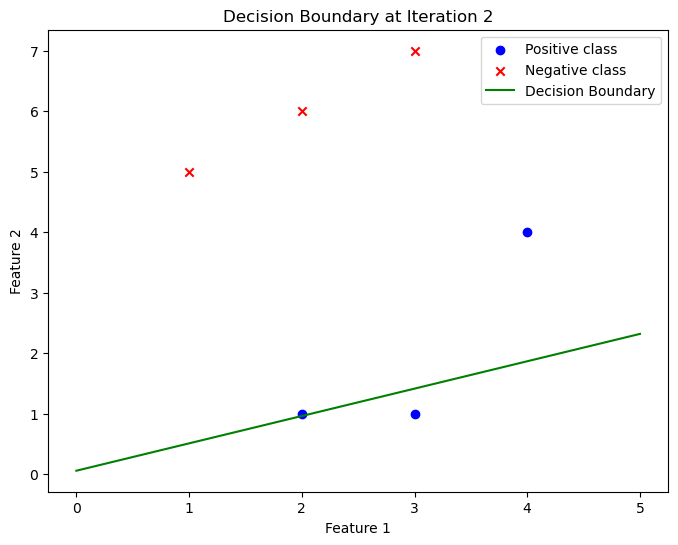

Iteration 2, Loss: 0.6077


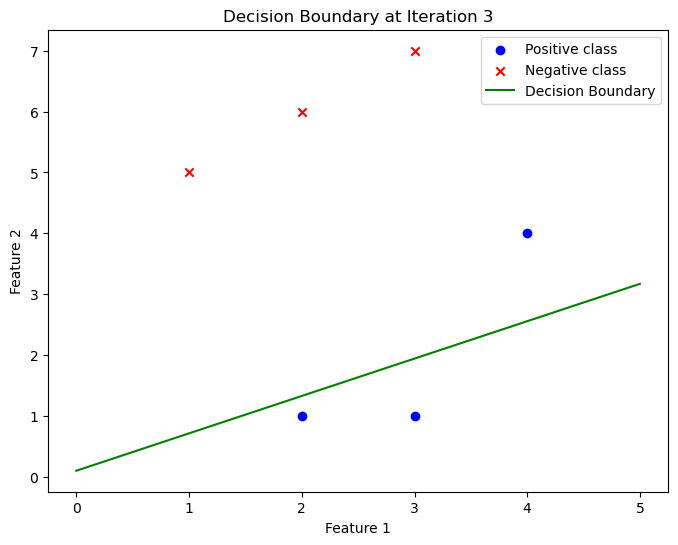

Iteration 3, Loss: 0.5611


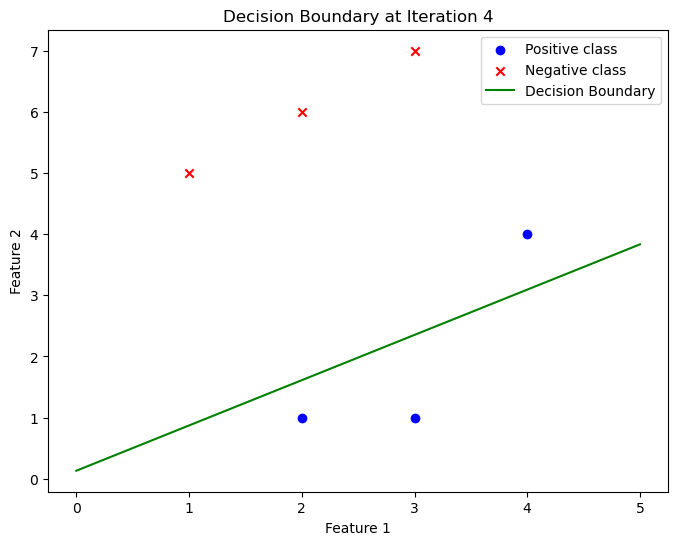

Iteration 4, Loss: 0.5225


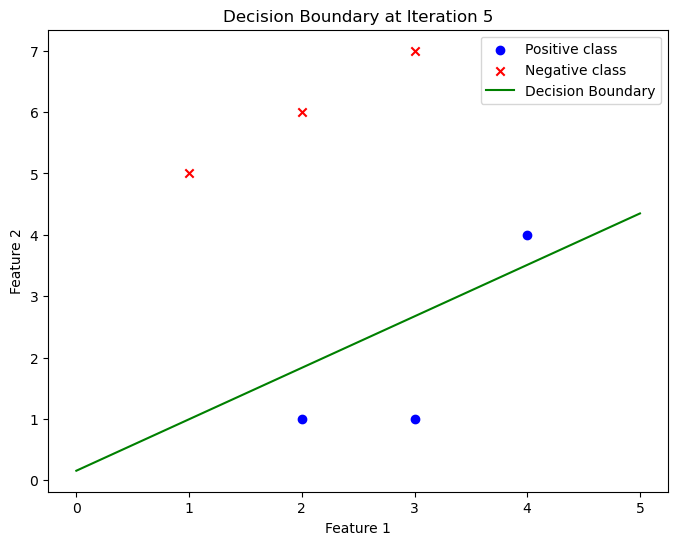

Iteration 5, Loss: 0.4882


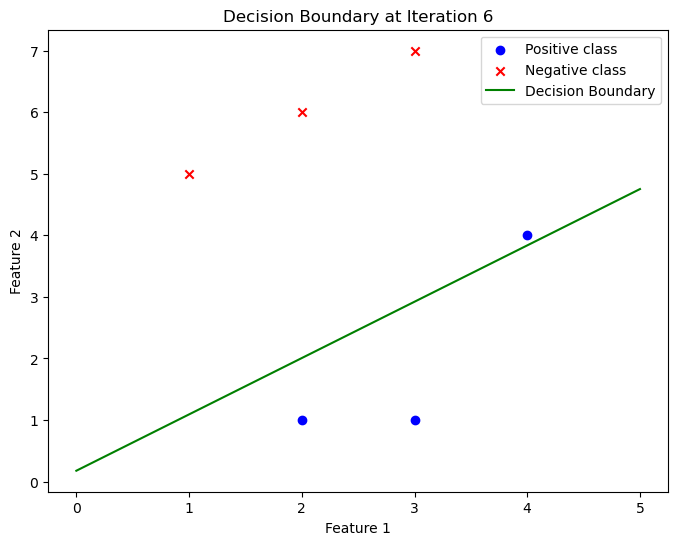

Iteration 6, Loss: 0.4574


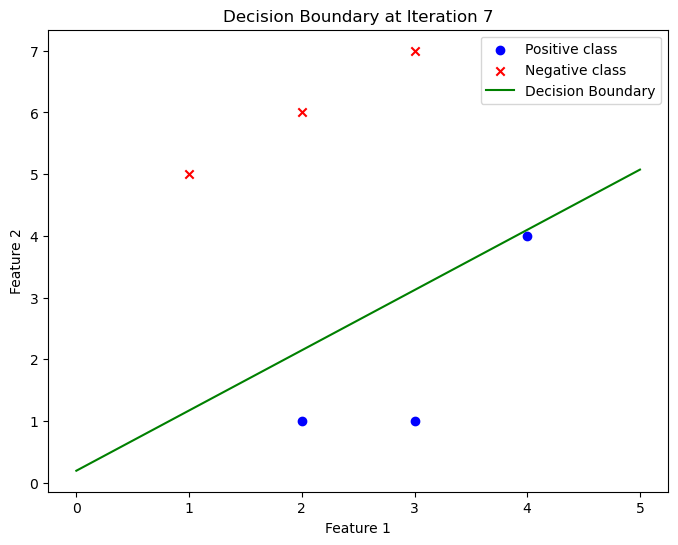

Iteration 7, Loss: 0.4297


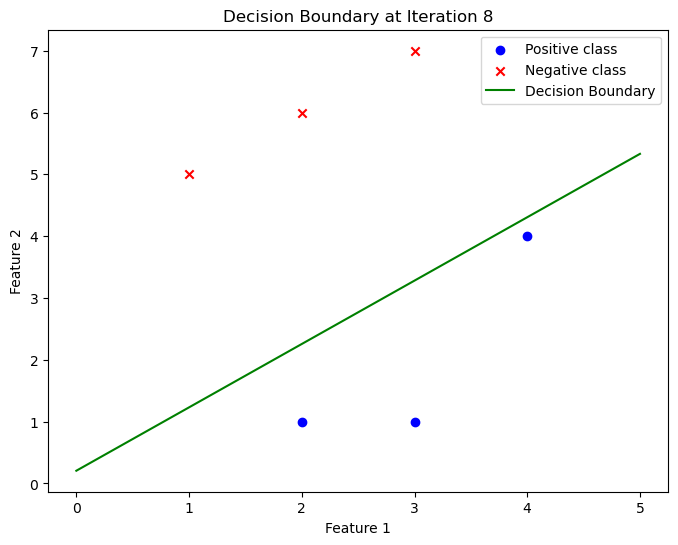

Iteration 8, Loss: 0.4047


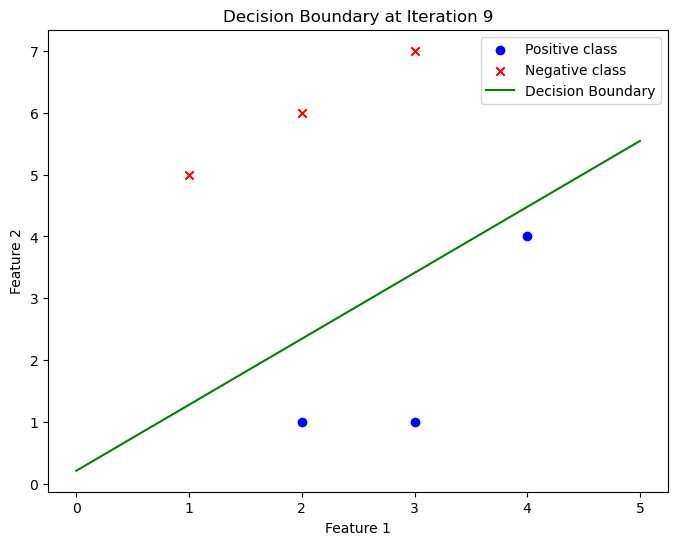

Iteration 9, Loss: 0.3820


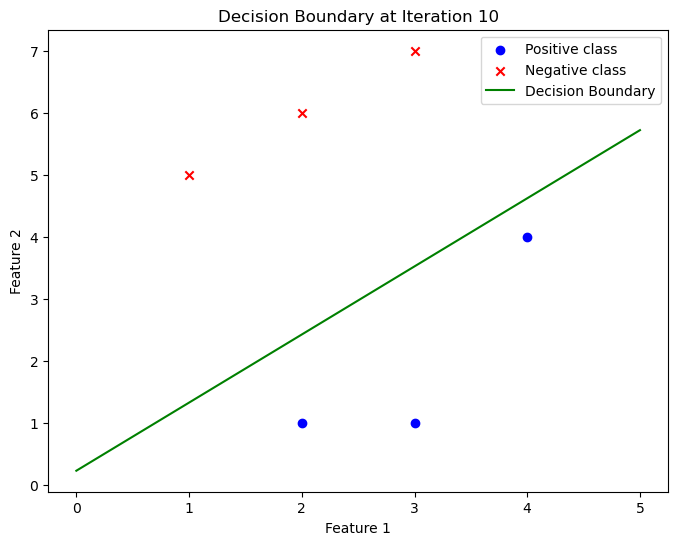

Iteration 10, Loss: 0.3615


In [11]:
weights = logistic_regression(X, y, learning_rate=0.1, num_iterations=10)